# STATISTICS 504 HW #3 <br>
12/04/2015 <br>
Fall 2015 <br>
Erich Seamon <br>
University of Idaho <br>
erichs@uidaho.edu <br>
http://github.com/erichseamon.com/stat504 <br>

# OVERVIEW

Conduct a data analysis for the above two Data Sets #1 and #2 using all you have learned in the semester to cleanup, build, and  compare/contrast the performance (10-CV with AUC- measure) of various models (including variables/features selections, 

1) Null,  
2) NB, <br> 
3) knn, <br> 
4) logistic regression, <br> 
5) SVM Polynomial kernel, <br> 
6) SVM Gaussian kernel, <br> 
7) Tree, 7) Bagging, <br> 
8) Random Forest, <br> 
9) Noisy Replications Ensembling, <br> 
10) plus one feasible model of your choice which was not covered in class). <br> <br> 

Overlay all model ROC curves in one figure for the same data set, with a legend key. Discuss your modeling process, interesting findings, and conclusions.

### DATA1: 

STRONG-R Male Sample_Reduced_2014-03-14.csv (with variables description in  STRONG Codebook.xls). The response variable is FelRecidYr3 (1 versus 0) - Felony recidivism in 3 years.

### DATA2: 

reviews_Musical_Instruments. The response variables is the reviewer’s rating in "overall": 5.0 versus 1.0 (ignore the other in-between ratings of 4.0, 3.0, and 2.0)

### Specifics:

•	Use 10CV mAUC measure to find the optimal model hyper-parameters <br>
•	For SVM, do both the polynomial and Gaussian kernel with the optimal model hyper-meters <br>
•	For Ensembling, do Bagging, Random Forest, and Noisy Replications <br>
•	You probably would have to run these complicated models on Amazon Web Service (AWS) at http://aws.amazon.com/  <br>
•	Measure and report the execution time for running each of these 10 models in Python.   <br>

Make sure that all your Python codes are documented and bug-free-executable, and all your reported results are reproducible. 15% will be deducted from non-executable non-reproducible codes/results.

Finally, please make sure that all your 3 .ipynb Notebooks for Homework#1, #2, and #3 should be in the same Github directory so they can be downloaded in one zip file.


# Homework Organization

All Models are run, first against Data1 (recidivism).  Next, all models are run against Data2 (Music).  Final results (ROC graphs, as well as CV.time.memory graphs) are in the RESULTS section at the end of the document.<br>


##### DATA1 RECIDIVISM<br>

Step1: Data Loading and Feature Extraction<br>
Step2: Feature Selection<br>
Step3: Model Evaluation<br>
* Model 1:Null<br>
* Model 2:NB Multinomial<br>
* Model 3:NB Gaussian<br>
* Model 4:NB Bernoulli<br>
* Model 5:KNN<br>
* Model 6:Logitstic Regression<br>
* Model 7:Decision Tree<br>
* Model 8:Bagged Decision Tree<br>
* Model 9:Random Forest<br>
* Model 10:Bagged Random Forest<br>
* Model 11:Noisy Replication<br>
* Model 12:XXX<br>

##### DATA2 MUSIC<br>

Step1: Data Loading and Feature Extraction<br>
Step2: Feature Selection<br>
Step3: Model Evaluation<br>
* Model 1:Null<br>
* Model 2:NB Multinomial<br>
* Model 3:NB Gaussian<br>
* Model 4:NB Bernoulli<br>
* Model 5:KNN<br>
* Model 6:Logitstic Regression<br>
* Model 7:Decision Tree<br>
* Model 8:Bagged Decision Tree<br>
* Model 9:Random Forest<br>
* Model 10:Bagged Random Forest<br>
* Model 11:Noisy Replication<br>
* Model 12:XXX<br>


##### RESULTS - all data<br>


In [73]:
import matplotlib
%matplotlib nbagg

import json
from pprint import pprint
from pyproj import Proj
import StringIO
from pandas import DataFrame
import pandas as pd
import seaborn as sns
import pydot
from IPython.display import Image
import scipy.sparse as sp
import urllib
import math
import sklearn
import psutil
import sys

from urllib2 import Request, urlopen
import json
from pandas.io.json import json_normalize
import numpy
from sklearn.cross_validation import cross_val_score

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import pandas as pd
import time
from memory_profiler import profile

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cross_validation import KFold
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.dummy import DummyClassifier
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.feature_selection.univariate_selection import SelectFpr

In [74]:
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 0.16.1.


In [75]:
%load_ext memory_profiler

The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler


# DATA1 - RECIDIVISM

# STEP 1: DATA LOADING - Recidivism

In [76]:
urllib.urlretrieve('http://webpages.uidaho.edu/~stevel/504/STRONG-R Male Sample_Reduced_2014-03-14.csv', '/git/data/hw3/strong.csv')

('/git/data/hw3/strong.csv', <httplib.HTTPMessage instance at 0x7f8a9625c7a0>)

In [77]:
data1 = pd.read_csv('/git/data/hw3/strong.csv')
data1['FelRecidYr3'].replace('', np.nan, inplace=True)

## Resample to n=5000 for computational purposes

In [78]:
data1 = data1.sample(n=5000)

In [79]:
filter = data1["FelRecidYr3"] != " "
data1 = data1[filter]
data1_a = data1


In [80]:
#data1.drop(data1.columns[FelRecidYr3], axis=1, inplace=True)
y = data1_a.FelRecidYr3.astype(int)
#datanew = data1.drop(data1.FelRecidYr3)
del data1['FelRecidYr3']
del data1['Unnamed: 338']
del data1['Unnamed: 339']
del data1['Unnamed: 340']


In [81]:
#feature_cols2 = ['AgeAsses3RN', 'AgeAtFirstConvR', 'JvFelCon', 'JvVioCon', 'JvComit', 'HomConv', 'SexConv', 'VProCon', 'AssaCon', 'DomVio', 'CopFodNd3', 'CopBugNd3', 'CopTraNd3', 'CopHygNd3', 'CopMedNd3', 'CopMHNd3']
#data1.drop(data1.columns["FelrecidYr3"], axis=1)
X = data1
#y = data1_a.FelRecidYr3.astype(int)
#y = pd.DataFrame(strongy)

# STEP 2: FEATURE SELECTION - Recidivism

## Of all the possible feature variables, which ones are the most important?  Picking the best 10 features from Recidivism dataset

### Using two methods: 

Random Forest with feature importance <br>
Using Univariate Kbest selection - and rank by pvalue


## Use random forest to score all the features

In [83]:
rf = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=42)
rf.fit(X, y)
#rf_scores = cross_val_score(rf, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='accuracy')
#rf_auc_scores = cross_val_score(rf, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='roc_auc')

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=True, random_state=42, verbose=0, warm_start=False)

<IPython.core.display.Javascript object>


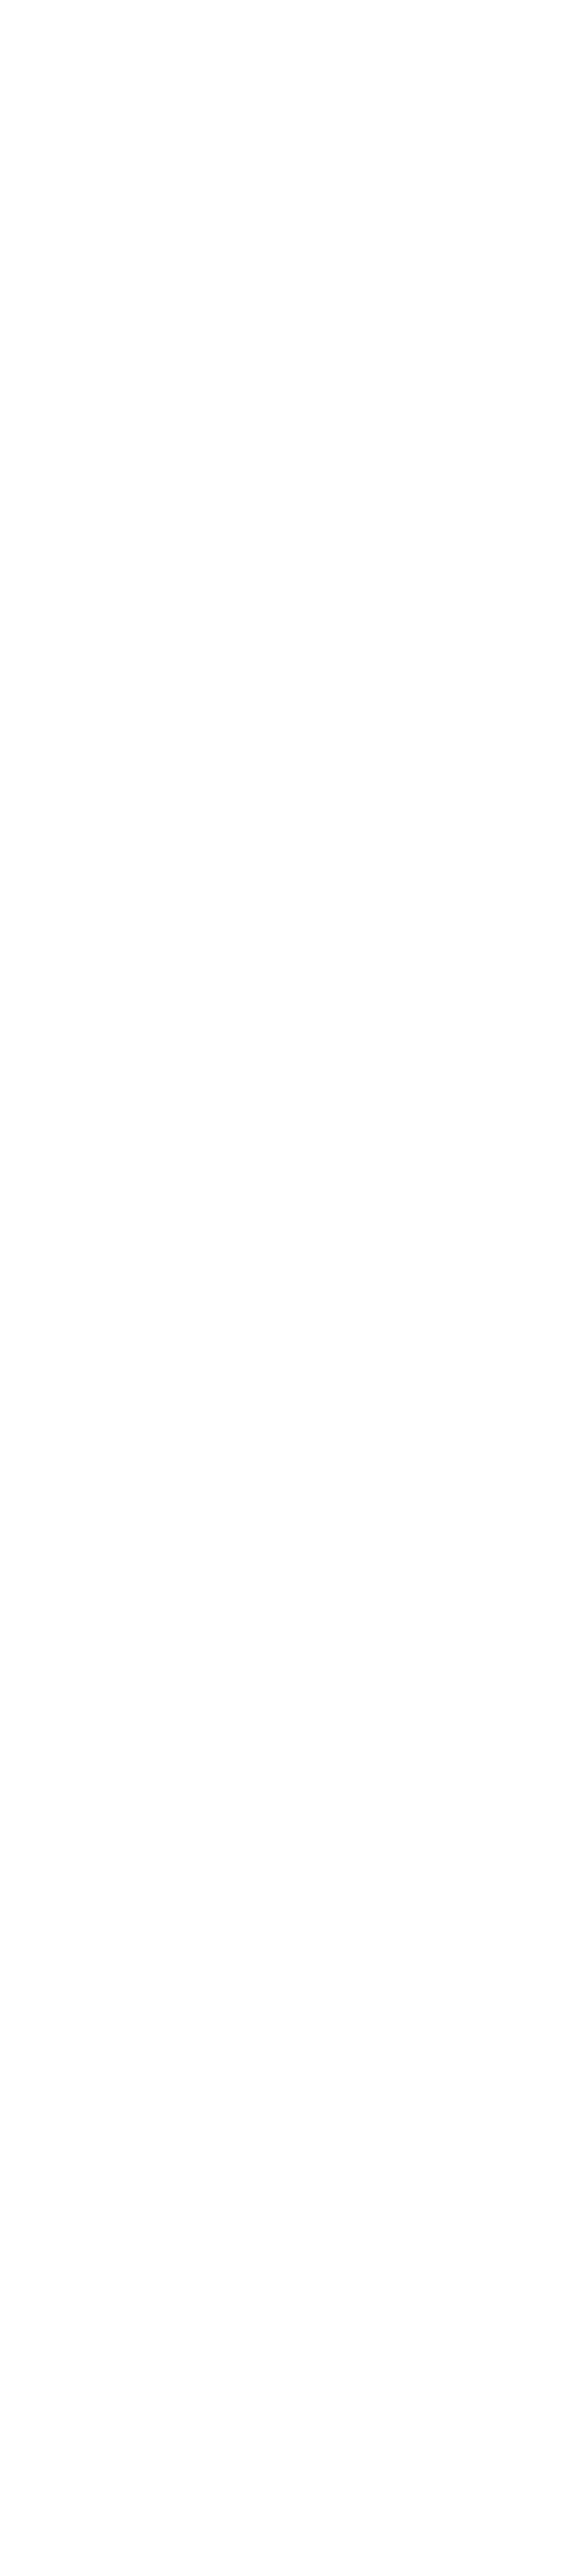

In [84]:
import matplotlib
%matplotlib nbagg

feature_importances = pd.Series(rf.feature_importances_, index=X.columns)
feature_importances.sort(ascending=True)
feature_importances.plot(kind="barh", figsize=(11,50));

### Random Forest determined lowest to most important features

In [85]:
feature_importances[:]

#feature_importances.sort_index(ascending=True)

FamCfDV3              0.000058
AgChFrSe3             0.000074
MHSuProv3             0.000122
STGStatus             0.000160
SexInfrac             0.000162
FamCfODV3             0.000164
AgChBizB3             0.000178
HomConv               0.000182
FPACfPDV3             0.000186
DrgSuPrs3             0.000186
EmBrCCI3              0.000225
MHSuL6At3             0.000247
FPACfTPA3             0.000261
FamHpHos3             0.000263
FamCfTPA3             0.000294
EmFiRPP3              0.000316
MHSuL6Co3             0.000329
AgMoHate3             0.000342
ResCuRTx3             0.000370
FamMCPRT3             0.000375
CountVioInfracR       0.000404
FamMCOVc3             0.000447
AgMoLMed3             0.000452
EmBrHyg3              0.000471
FamPrEmp3             0.000473
MHSuOnGo3             0.000477
FamMCLAP3             0.000489
FamMCCOP3             0.000502
DrgSuFRx3             0.000505
FPAPbPMH3             0.000525
                        ...   
RelChild3             0.006130
Coc3RC  

### Determining top features thru the use of Kbest selection (Univariate)

In [86]:
topfeatures = SelectKBest(chi2, k=all)

In [87]:
topfeatures = SelectFpr(chi2, alpha=0.05)

### Graph showing p values from feature selection/importance model, with .05 cutoff

<IPython.core.display.Javascript object>


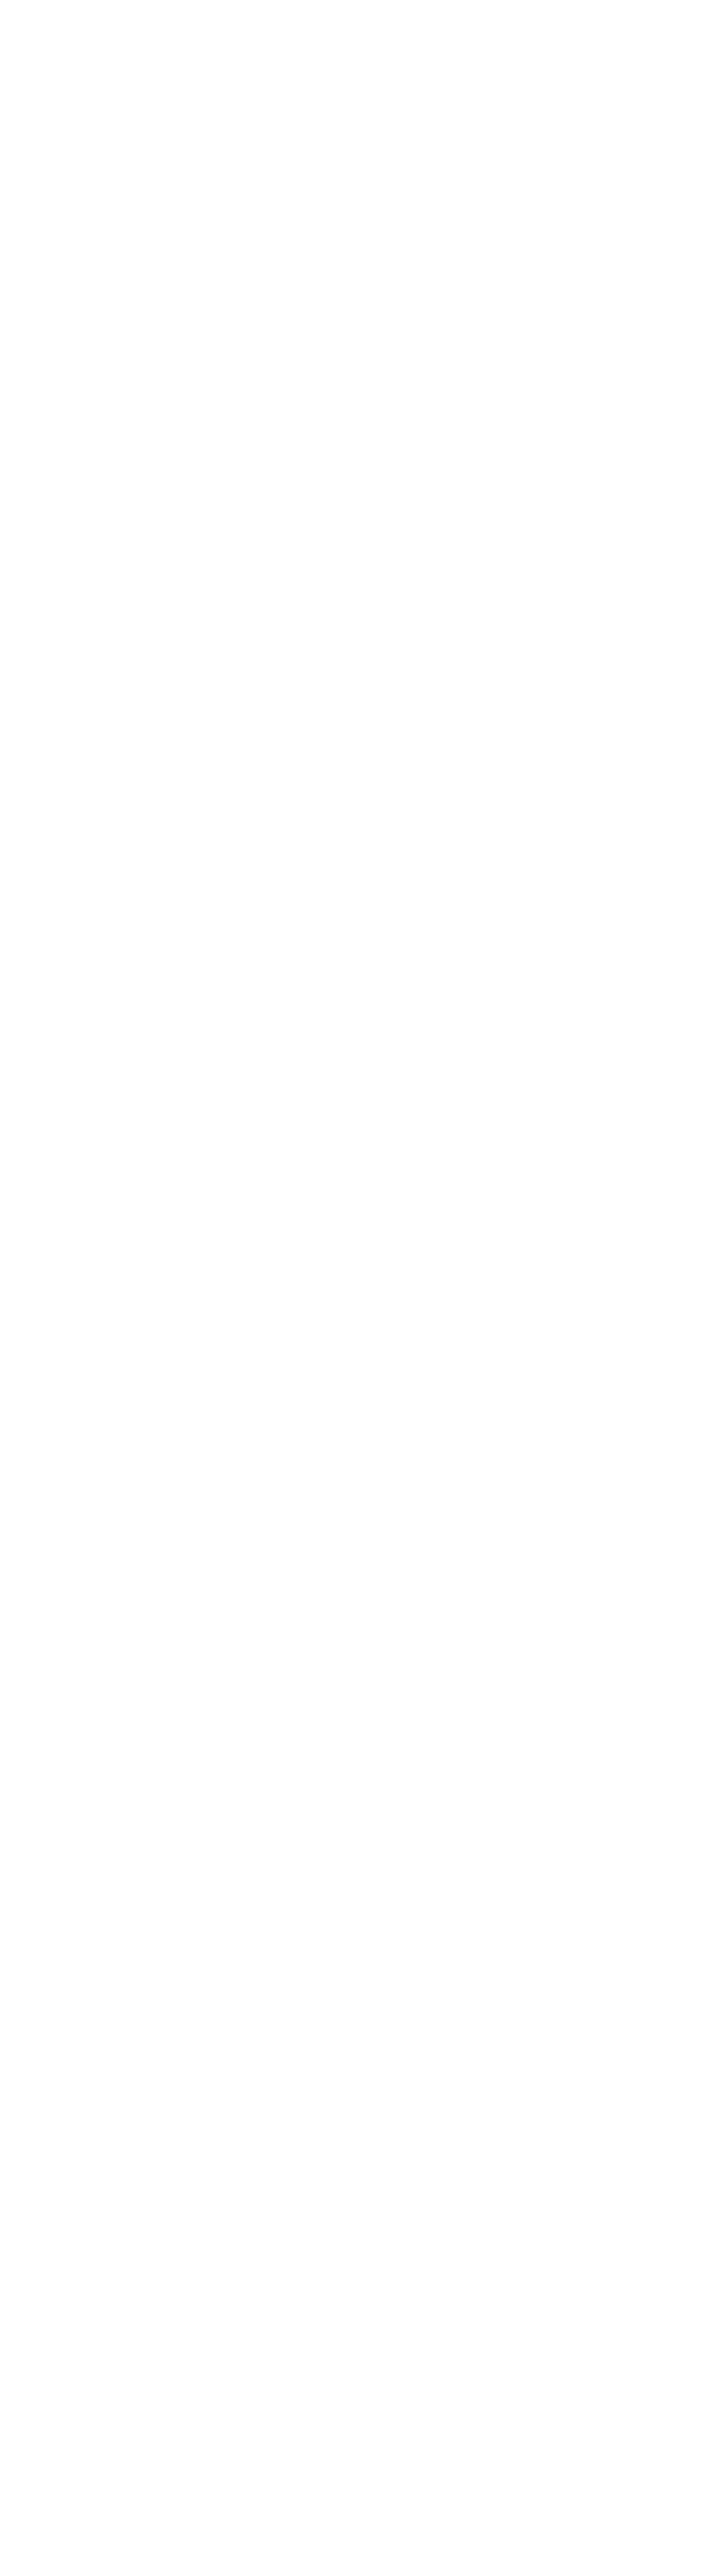

In [88]:
import matplotlib
%matplotlib nbagg

import pylab as pl

#pl.figure(1)
#pl.clf()

x_indices = np.arange(X.shape[-1])

selector = SelectFpr(f_classif, alpha=0.05)
selector.fit(X, y)
#scores = -np.log10(selector.pvalues_)
#scores /= scores.max()

tindex = pd.Series(selector.pvalues_, index=X.columns)
tindex.sort()
tindex.plot(kind="barh", figsize=(11,40));
plt.axvline(x=0.05, ymin=0, ymax = 5, linewidth=1, color='red')

#pl.bar(index, selector.pvalues_, width=1, color='red')
#plt.axhline(y=.05, xmin=0, xmax=350, linewidth=1, color = 'blue')

##### Table of top 65 features, with p-values below .05

In [89]:
b = selector.pvalues_ < .05
b = pd.DataFrame(b)
b.rename(columns={0: 'sig'}, inplace=True)

Xcol = pd.DataFrame(X.columns)
bresult = pd.concat([b, Xcol], axis=1)
bresult.rename(columns={0: 'name'}, inplace=True)
bresult2 = bresult.loc[bresult['sig'] == True]

In [90]:
#bresult.loc[bresult['0'] == False]
#topfeatures = {k:v for k,v in enumerate(bresult) if v == False}
#topf = topfeatures.items()
#topfe = pd.DataFrame(topf)


In [91]:
bresult2

sig                 name
0    True          AgeAsses3RN
1    True      AgeAtFirstConvR
2    True             JvFelCon
3    True             JvVioCon
4    True              JvComit
6    True              SexConv
7    True              VProCon
9    True               DomVio
10   True              FelWeap
11   True              FelProp
12   True              DrugCon
14   True              MisAssa
15   True              MisdDom
19   True             MisdProp
20   True             MisdDrug
21   True             MisdEscp
23   True   TotalAdultFelonies
24   True       LastConviction
25   True       TechVioPriorsR
26   True         CountInfracR
27   True      CountVioInfracR
28   True     CountInfracEverR
29   True  CountVioInfracEverR
30   True        SeriousInfrac
31   True    SeriousInfracEver
33   True        SexInfracEver
34   True            STGStatus
35   True       YearlyVisitsMR
36   True      RelToSuperFromD
37   True        CChangeCurrRN
..    ...                  ...
297  True              AtMoDx3
298  True             AtChNo3R
301  True            AtChNdTh3
302  True            AtChDecS3
303  True            AtChDecG3
305  True            AtChPara3
306  True            AtChTact3
308  True            AtChFaPr3
309  True            AtChFaRe3
310  True            AtChCrDi3
311  True             AtRsL63R
312  True             AtRsSup3
315  True            AtRsDCoR3
316  True             AtRsNBR3
318  True            AtRsBost3
319  True             AttAuth3
320  True             RespOth3
321  True            Readychg3
322  True             BelfSuc3
323  True             ConsThk3
324  True             ImpCont3
325  True             DealOth3
326  True             ProbSol3
327  True            CopLv3MRV
328  True            CopEmpNd3
329  True            CopHouNd3
331  True            CopFodNd3
332  True            CopBugNd3
333  True            CopTraNd3
335  True            CopMedNd3

[190 rows x 2 columns]

In [92]:
bresult3 = bresult2["name"].tolist()

In [93]:

#feature_cols2 = ['RespOth3', 'EDQuitExpell', 'EduGdCom3N', 'FelProp', 'AgeAsses3RN', 'EmpLeng3R', 'AgeAtFirstConvR', 'FrnAnti3RC', 'TotalAdultFelonies', 'LastConviction']
#data1.drop(data1.columns["FelrecidYr3"], axis=1)
X = data1[bresult3]
#y = data1_a.FelRecidYr3.astype(int)
#y = pd.DataFrame(strongy)


## run train test split

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99)

# STEP 3 : MODEL EVALUATION - Recidivism

### MODEL 1: Comparing Test Accuracy with Null Accuracy

Null accuracy is the accuracy that could be achieved by always predicting the most frequent class. It is a benchmark against which you may want to measure your classification model.


In [95]:
# examine the class distribution
y_test.value_counts()

0    452
1    218
dtype: int64

In [96]:
nulltime1 = %%timeit -o 1 + 2
# calc the null accuracy
y_test.value_counts().head(1) / len(y_test)

10000000 loops, best of 3: 29.7 ns per loop


0    0.674627
dtype: float64

In [97]:
nullmodel = sklearn.dummy.DummyClassifier(strategy='most_frequent', random_state=99, constant=None)

In [98]:
nullmodel.fit(X,y)

DummyClassifier(constant=None, random_state=99, strategy='most_frequent')

In [99]:
y_pred_prob = nullmodel.predict_proba(X_test)[:, 1]

In [100]:
# calculate AUC
print metrics.roc_auc_score(y_test, y_pred_prob)

0.5


<IPython.core.display.Javascript object>


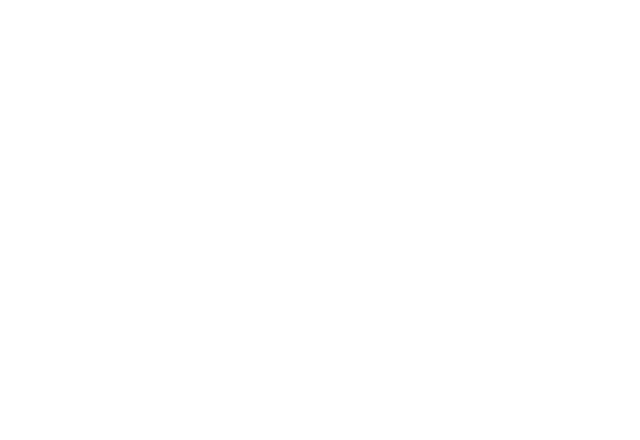

In [101]:
import matplotlib
%matplotlib nbagg
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)


In [102]:
nullmodel_mean1 = cross_val_score(nullmodel, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='accuracy').mean()

In [103]:
nullmodel_scores1 = cross_val_score(nullmodel, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='roc_auc')

### MODEL 2: Naive-Bayes

### MODEL 2: Naive-Bayes - Multinomial Naive Bayes

In [104]:
import time
start = time.time()

from sklearn.naive_bayes import MultinomialNB
nbm = MultinomialNB()
nbm.fit(X, y)
MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
nbm_scores = cross_val_score(nbm, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='accuracy')

end = time.time()
nbmtime1 = end - start
print nbmtime1

The slowest run took 75.78 times longer than the fastest. This could mean that an intermediate result is being cached 
10000000 loops, best of 3: 29.7 ns per loop


In [105]:
print nbm_scores

[ 0.69029851  0.71641791  0.65298507  0.69776119  0.6641791   0.67164179
  0.70895522  0.62686567  0.69029851  0.70411985]


In [106]:
nbm_scores_mean1 = cross_val_score(nbm, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='accuracy').mean()
print nbm_scores_mean1

0.684581306948


In [107]:
nbm_scores_auc1 = cross_val_score(nbm, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='roc_auc').mean()
print nbm_scores_auc1

0.708887123224


In [108]:
mean_score = nbm_scores.mean()
std_dev = nbm_scores.std()
std_error = nbm_scores.std() / math.sqrt(nbm_scores.shape[0])
ci =  2.262 * std_error
lower_bound = mean_score - ci
upper_bound = mean_score + ci

print "Multinomial NB Score is %f +/-  %f" % (mean_score, ci)
print "Multinomial NB AUC is "
print '95 percent probability that if this experiment were repeated over and over the average score would be between %f and %f' % (lower_bound, upper_bound)

Multinomial NB Score is 0.682352 +/-  0.019049
Multinomial NB AUC is 
95 percent probability that if this experiment were repeated over and over the average score would be between 0.663303 and 0.701401


### MODEL 2: Naive-Bayes - Gaussian Naive Bayes

In [109]:
import time
start = time.time()

from sklearn.naive_bayes import GaussianNB
nbg = GaussianNB()
nbg.fit(X, y)
GaussianNB()
nbg_scores = cross_val_score(nbg, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='accuracy')
print nbg_scores

end = time.time()
nbgtime1 = end - start
print nbgtime1

The slowest run took 40.13 times longer than the fastest. This could mean that an intermediate result is being cached 
10000000 loops, best of 3: 29.7 ns per loop
[ 0.73134328  0.62686567  0.70895522  0.68283582  0.65298507  0.65671642
  0.7761194   0.72014925  0.69029851  0.71161049]


In [110]:
nbg_scores_mean1 = cross_val_score(nbg, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='accuracy').mean()
print nbg_scores_mean1

0.696156856169


In [111]:
nbg_scores_auc1 = cross_val_score(nbg, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='roc_auc').mean()
print nbg_scores_auc1

0.693469744133


### MODEL 2: Naive-Bayes - Bernoulli Naive Bayes

In [112]:
import time
start = time.time()

from sklearn.naive_bayes import BernoulliNB
nbb = BernoulliNB()
nbb.fit(X, y)
BernoulliNB(alpha=1.0, class_prior=None, fit_prior=True)
nbb_scores = cross_val_score(nbb, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='accuracy')
print nbb_scores

end = time.time()
nbbtime1 = end - start
print nbbtime1

10000000 loops, best of 3: 29.7 ns per loop
[ 0.64552239  0.68283582  0.71641791  0.72761194  0.63432836  0.61940299
  0.64552239  0.68283582  0.68656716  0.71161049]


In [113]:
nbb_scores_mean1 = cross_val_score(nbb, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='accuracy').mean()
print nbb_scores_mean1

0.67749175471


In [114]:
nbb_scores_auc1 = cross_val_score(nbb, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='roc_auc').mean()
print nbb_scores_auc1

0.712397113321


### MODEL 2: Naive-Bayes - Best performing Naive Bayes??

<IPython.core.display.Javascript object>


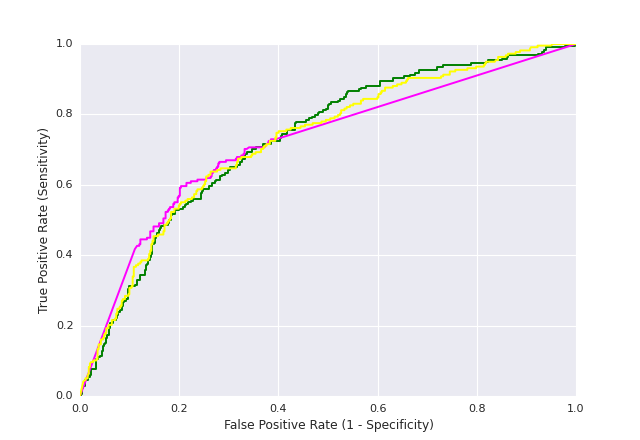

In [115]:
# TASK 7: plot the ROC curve
import matplotlib
%matplotlib nbagg
from sklearn import metrics
import pandas as pd
from ggplot import *


nbm_preds = nbm.predict_proba(X_test)[:,1]
nbm_fpr, nbm_tpr, _ = metrics.roc_curve(y_test, nbm_preds)

nbg_preds = nbg.predict_proba(X_test)[:,1]
nbg_fpr, nbg_tpr, _ = metrics.roc_curve(y_test, nbg_preds)

nbb_preds = nbb.predict_proba(X_test)[:,1]
nbb_fpr, nbb_tpr, _ = metrics.roc_curve(y_test, nbb_preds)

plt.plot(nbm_fpr, nbm_tpr, color='green')
plt.plot(nbg_fpr, nbg_tpr, color='magenta')
plt.plot(nbb_fpr, nbb_tpr, color='yellow')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')


### Multinomial NB was the best performing NB with an AUC of 68%.  (green ROC above)

### MODEL3: KNN

In [116]:
knn = KNeighborsClassifier(n_neighbors=9)
#strongy = data1.FelRecidYr3
knn.fit(X,y)
knn_scores = cross_val_score(knn, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='accuracy')

In [117]:
print knn_scores

[ 0.69776119  0.69776119  0.67537313  0.66791045  0.68283582  0.69402985
  0.70522388  0.69776119  0.69402985  0.70037453]


In [118]:
# use average accuracy as an estimate of out-of-sample accuracy
knn_scores_mean1 = knn_scores.mean()
print knn_scores_mean1

0.6913061099


In [119]:
knn_scores_auc = cross_val_score(knn, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='roc_auc').mean()
print knn_scores_auc

0.673526077289


In [120]:
# search for an optimal value of K for KNN
k_range = range(1, 100)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn_scores = cross_val_score(knn, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='accuracy')
    k_scores.append(knn_scores.mean())
print k_scores

[0.66405612387500701, 0.69915311085024323, 0.68272961037509083, 0.69728604170160435, 0.6894320532170608, 0.69727625915366986, 0.69055704622952652, 0.69915450835709092, 0.69651461792162772, 0.70137794175191448, 0.69802392531723412, 0.70063307060204605, 0.70064984068421943, 0.70025993627368777, 0.70398289451618312, 0.70585974621275649, 0.69877857901503726, 0.70660182234892943, 0.70175666610766385, 0.70438677399519256, 0.70213539046341322, 0.70398429202303081, 0.70585834870590869, 0.7054949969254849, 0.70883643579853539, 0.70848007155235071, 0.70510649002180126, 0.70473894572083406, 0.70997400637263131, 0.70398568952987883, 0.7076932751970485, 0.71183548549387887, 0.70101319246464311, 0.70997260886578351, 0.70511487506288772, 0.70662138744479852, 0.70883783330538319, 0.7055075744871151, 0.70773240538878635, 0.70398988205042212, 0.70586813125384307, 0.7084758790318072, 0.70547543182961614, 0.70995863379730551, 0.71071328749510854, 0.70922773771591496, 0.70809994968975354, 0.707717032813460

<IPython.core.display.Javascript object>


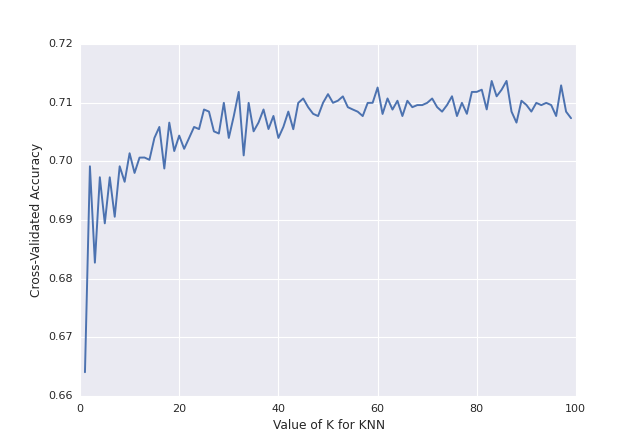

In [121]:
import matplotlib
%matplotlib nbagg

# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

### MODEL3: KNN - Re-run KNN model with optimized K = 40

In [122]:
import time
start = time.time()

knn = KNeighborsClassifier(n_neighbors=40)
#strongy = data1.FelRecidYr3
knn_scores = cross_val_score(knn, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='accuracy')

end = time.time()
knntime1 = end - start

In [123]:
import math
mean_score = knn_scores.mean()
std_dev = knn_scores.std()
std_error = knn_scores.std() / math.sqrt(knn_scores.shape[0])
ci =  2.262 * std_error
lower_bound = mean_score - ci
upper_bound = mean_score + ci

print "Score is %f +/-  %f" % (mean_score, ci)
print '95 percent probability that if this experiment were repeated over and over the average score would be between %f and %f' % (lower_bound, upper_bound)

Score is 0.706958 +/-  0.022922
95 percent probability that if this experiment were repeated over and over the average score would be between 0.684037 and 0.729880


In [124]:
# use average accuracy as an estimate of out-of-sample accuracy
knn_mean1 = knn_scores.mean()

### MODEL 4: Logistic Regression

#### MODEL 4: Logistic Regression - 10-fold cross-validation with logistic regression

In [125]:
import time
start = time.time()

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X,y)
logreg_scores = cross_val_score(logreg, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='accuracy')

end = time.time()
logregtime1 = end - start

#### MODEL 4: Logistic Regression - Print Logistic Regression cross validation accuracy scores

In [126]:
print logreg_scores

[ 0.70895522  0.68656716  0.71641791  0.69776119  0.67164179  0.70149254
  0.69776119  0.69402985  0.73134328  0.75280899]


#### MODEL 4: Logistic Regression - Print Logistic Regression cross validation accuracy score - mean

In [127]:
logreg_mean1 = cross_val_score(logreg, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='accuracy').mean()

#### MODEL 4: Logistic Regression - Print Logistic Regression cross validation auc score - mean

In [128]:
logreg_auc_scores = cross_val_score(logreg, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='roc_auc').mean()

In [129]:
print logreg_auc_scores.mean()

0.707499342592


In [130]:
mean_score = logreg_scores.mean()
std_dev = logreg_scores.std()
std_error = logreg_scores.std() / math.sqrt(logreg_scores.shape[0])
ci =  2.262 * std_error
lower_bound = mean_score - ci
upper_bound = mean_score + ci

print "Score is %f +/-  %f" % (mean_score, ci)
print '95 percent probability that if this experiment were repeated over and over the average score would be between %f and %f' % (lower_bound, upper_bound)

Score is 0.705878 +/-  0.015685
95 percent probability that if this experiment were repeated over and over the average score would be between 0.690193 and 0.721562


### MODEL 5: SVM Polynomial Kernel

#### MODEL 5: SVM Polynomial Kernel - 10-fold cross-validation with SVM Poly

In [131]:
# 10-fold cross-validation with SVM Polynomial
from sklearn import svm
svmpoly = svm.SVC(kernel='poly', gamma=2)
svmpoly.fit(X,y)
svmpoly_scores = cross_val_score(svmpoly, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='accuracy')
print svmpoly_scores

[ 0.63432836  0.68656716  0.70522388  0.69402985  0.68656716  0.69402985
  0.65671642  0.65671642  0.65298507  0.65917603]


#### MODEL 5: SVM Polynomial Kernel - Search for an optimal gamma/depth for SVM Polynomial

In [145]:
# search for an optimal gamma for SVM Polynomial
g_range = range(1, 10)
g_scores = []
for k in g_range:
    svmpoly = svm.SVC(kernel='poly', gamma=k)
    scores = cross_val_score(svmpoly, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='accuracy')
    g_scores.append(scores.mean())
print g_scores

[0.67599642238246971, 0.67412655822013523, 0.67113030353848735, 0.67412516071328754, 0.67300436022136512, 0.6640533288613113, 0.67562468556095923, 0.67263821342724583, 0.66779165967913245]


<IPython.core.display.Javascript object>


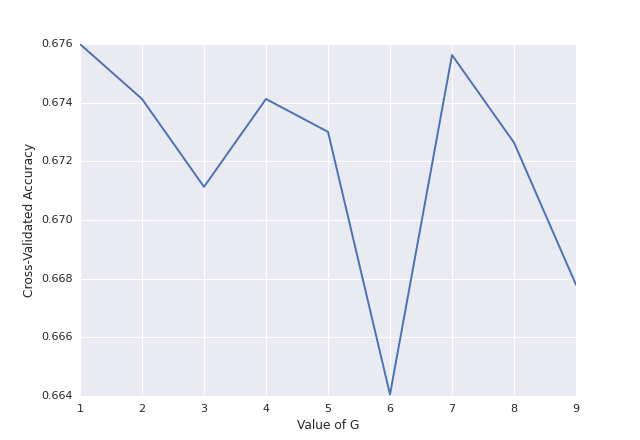

In [146]:
import matplotlib
%matplotlib nbagg

# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(g_range, g_scores)
plt.xlabel('Value of G')
plt.ylabel('Cross-Validated Accuracy')

## 10-fold cross-validation with SVM Polynomial - optimized

In [148]:
import time
start = time.time()

from sklearn import svm
svmpoly = svm.SVC(kernel='poly', gamma=1)
svmpoly.fit(X,y)
svmpoly_scores = cross_val_score(svmpoly, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='accuracy')

end = time.time()
svmpolytime1 = end - start

In [150]:
svmpoly_mean1 = cross_val_score(svmpoly, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='accuracy').mean()
print svmpoly_mean1

### MODEL 5: SVM Gaussian Kernel

In [152]:
from sklearn import svm
svmrbf = svm.SVC(kernel='rbf', gamma=2)
svmrbf.fit(X,y)
svmrbf_scores = cross_val_score(svmrbf, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='accuracy')
print svmrbf_scores

[ 0.70149254  0.69776119  0.68283582  0.71268657  0.69029851  0.70149254
  0.65298507  0.70522388  0.66791045  0.69662921]


In [153]:
g_range = range(1, 10)
g_scores = []
for k in g_range:
    svmg = svm.SVC(kernel='poly', gamma=k)
    scores = cross_val_score(svmg, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='accuracy')
    g_scores.append(scores.mean())
print g_scores

[0.6771339929565654, 0.67450668008273229, 0.67340264967298347, 0.67526971882162212, 0.67301554027614741, 0.68160182234892952, 0.67335792945385431, 0.66665688411873214, 0.67264100844094132]


<IPython.core.display.Javascript object>


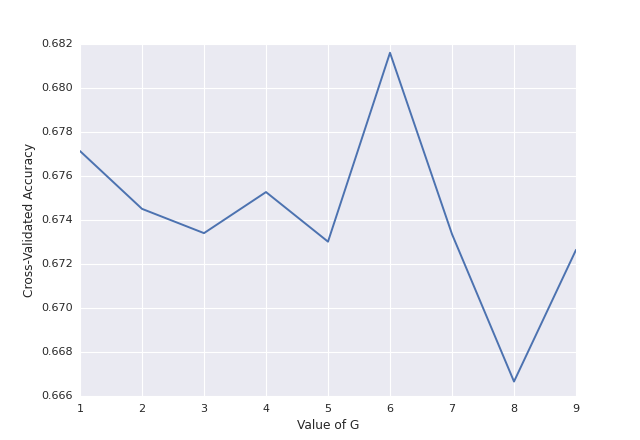

In [154]:
import matplotlib
%matplotlib nbagg

# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(g_range, g_scores)
plt.xlabel('Value of G')
plt.ylabel('Cross-Validated Accuracy')

## MODEL 5: SVM Gaussian Kernel optimized

In [158]:
import time
start = time.time()

from sklearn import svm
svmrbf = svm.SVC(kernel='rbf', gamma=6)
svmrbf.fit(X,y)
svmrbf_scores = cross_val_score(svmrbf, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='accuracy').mean()

end = time.time()
svmgaustime1 = end - start

### MODEL 6: Decision Tree

#### MODEL 6: Decision Tree - Initial Decision Tree with max depth of 10

In [159]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=10)
clf.fit(X,y)
clf_scores = cross_val_score(clf, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='accuracy')

#### MODEL 6: Decision Tree - Print Decision Tree cross validation accuracy scores

In [160]:
print clf_scores

[ 0.59701493  0.63432836  0.6641791   0.66044776  0.67910448  0.70149254
  0.67164179  0.66791045  0.68283582  0.60674157]


#### MODEL 6: Decision Tree -  Print Decision Tree cross validation accuracy score - mean

In [161]:
clf_scores_mean1 = cross_val_score(clf, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='accuracy').mean()
print clf_scores_mean1

0.656967969143


#### MODEL 6: Decision Tree - Print Decision Tree cross validation auc score - mean

In [162]:
clf_scores_auc = cross_val_score(clf, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='roc_auc').mean()
print clf_scores_auc

0.597045371226


#### MODEL 6: Decision Tree - Save and print graphic of Decision Tree

In [163]:
from sklearn.externals.six import StringIO  
import pydot 
dot_data = StringIO() 
tree.export_graphviz(clf, out_file=dot_data)
graph = pydot.graph_from_dot_data(dot_data.getvalue()) 

In [164]:
graph.write_jpeg("hw3_tree_plot.jpg")

True

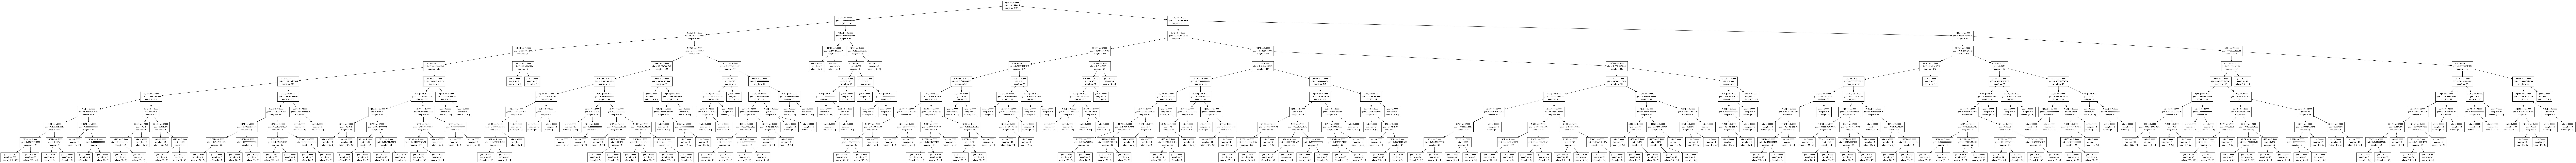

In [165]:
from IPython.display import Image
Image(filename='hw3_tree_plot.jpg')

### MODEL 6: Decision Tree - search for an optimal gamma/depth for Decision Tree

In [166]:
t_range = range(1, 50)
t_scores = []
for k in t_range:
    clf = tree.DecisionTreeClassifier(max_depth=k)
    scores = cross_val_score(clf, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='accuracy')
    t_scores.append(scores.mean())
print t_scores

[0.69018251439432066, 0.68235088601934146, 0.683457711442786, 0.6849628263178491, 0.67747638213427253, 0.67673570350494727, 0.66555145620213529, 0.67188775224998609, 0.64875342389177715, 0.64722734641399737, 0.64464056123875002, 0.65434065626921567, 0.64725669405780084, 0.6420216334060036, 0.63381128067527537, 0.6465104254010845, 0.63381687070266635, 0.63307898708703669, 0.63943205321706065, 0.64279026217228463, 0.62486444183576506, 0.62223293644138855, 0.6405374811336576, 0.6110514841522724, 0.62187237967466036, 0.63716669461680364, 0.61963636871820671, 0.62712001788808769, 0.62969143048800935, 0.63383084577114424, 0.61778327463804561, 0.62299457767343058, 0.61963217619766342, 0.63493487618089328, 0.61963636871820671, 0.63383224327799215, 0.62487142937000395, 0.62337050701548447, 0.62934065626921565, 0.6390477388339203, 0.62261864833137681, 0.63270166023813512, 0.62971239309072602, 0.6181536139527084, 0.63158505226675621, 0.63381267818212306, 0.63044608418581249, 0.62673430599809943, 

### MODEL 6: Decision Tree - Plot accuracy of cross validation runs vs. values of depth

<IPython.core.display.Javascript object>


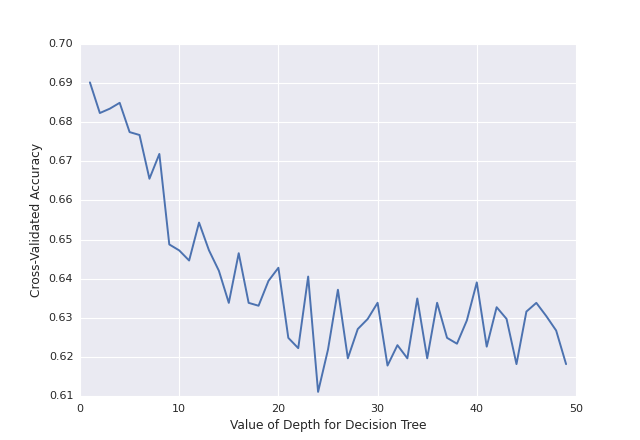

In [167]:
import matplotlib
%matplotlib nbagg
plt.plot(t_range, t_scores)
plt.xlabel('Value of Depth for Decision Tree')
plt.ylabel('Cross-Validated Accuracy')

### MODEL 6: Decision Tree - Model optimization results:

After examining accuracy for a variety of depths, its appears that a value of ~24 for a max depth is optimal in terms of cross validation accuracy.

### MODEL 6: Decision Tree - Re-run Decision Tree model with optimized Depth = 1

In [178]:
import time
start = time.time()

from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=1)
clf.fit(X,y)
clf_scores_mean1 = cross_val_score(clf, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='accuracy').mean()

end = time.time()
clftime1 = end - start

In [179]:
clf_mean1 = clf_scores_mean1

In [180]:
print clf_mean1

0.690176924367


### MODEL 7: Bootstrap Aggregation using Decision Tree

In [183]:
bag_scores = []

bag_range = range(1, 50)

for k in bag_range:
    bag_clf = BaggingClassifier(clf, n_estimators=k, max_samples=1.0, bootstrap = False, bootstrap_features = True, random_state=42)
    bag_clf.fit(X, y)
    bag_clf_scores = cross_val_score(bag_clf, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='accuracy')
    bag_scores.append(bag_clf_scores.mean())

<IPython.core.display.Javascript object>


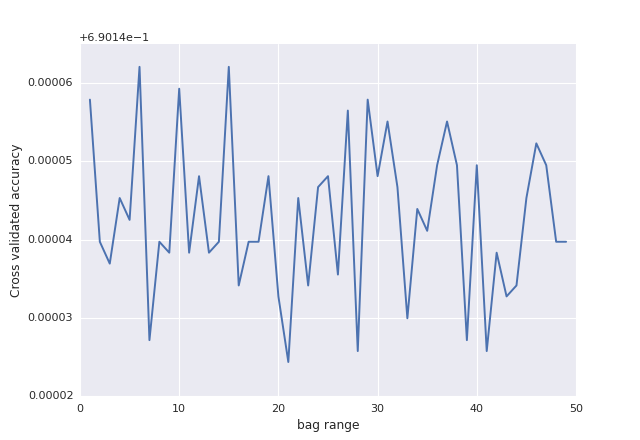

In [185]:
import matplotlib
%matplotlib nbagg
# plot max_depth (x-axis) versus RMSE (y-axis)
plt.plot(bag_range, bag_scores)
plt.xlabel('bag range')
plt.ylabel('Cross validated accuracy')

## MODEL 8: Bagged Decision Tree - Optimized

In [186]:
import time
start = time.time()

bag_clf = BaggingClassifier(clf, n_estimators=15, max_samples=1.0, bootstrap = False, bootstrap_features = True, random_state=42)
bag_clf.fit(X, y)
bag_clf_scores = cross_val_score(bag_clf, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='accuracy').mean()

end = time.time()
bagclftime1 = end - start

In [187]:
print bag_clf_scores

0.690178321874


### MODEL 8: Random Forest

In [188]:
rf = RandomForestClassifier(n_estimators=50, oob_score=True, random_state=42)
rf.fit(X, y)
rf_scores = cross_val_score(rf, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='accuracy')
#rf_auc_scores = cross_val_score(rf, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='roc_auc')

In [189]:
print rf_scores

[ 0.72761194  0.69776119  0.67910448  0.70149254  0.69776119  0.70149254
  0.66044776  0.76492537  0.65671642  0.71910112]


In [190]:
print rf_scores.mean()

0.700641455643


In [191]:
rf.oob_score_

0.69540873460246355

In [ ]:
#y_oob = rf.oob_prediction_
#print "c-stat: ", roc_auc_score(y, y_oob)

### MODEL 8: Random Forest - Find optimal number of leaves

In [192]:
results = []
min_samples_leaf_options = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]
for min_samples in min_samples_leaf_options:
    rf = RandomForestClassifier(n_estimators=100, 
                                  oob_score=True, 
                                  n_jobs=-1, 
                                  random_state=42, 
                                  max_features="auto", 
                                  min_samples_leaf=min_samples)
    rf.fit(X, y)
    print min_samples, "min samples"
    roc = cross_val_score(rf, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='roc_auc').mean()
    print "C-stat: ", roc
    results.append(roc)
    print ""

1 min samples
C-stat:  0.725401925995

2 min samples
C-stat:  0.729963685192

3 min samples
C-stat:  0.732017395747

4 min samples
C-stat:  0.730444357016

5 min samples
C-stat:  0.7315816972

6 min samples
C-stat:  0.728434381627

7 min samples
C-stat:  0.73022149599

8 min samples
C-stat:  0.730045208215

9 min samples
C-stat:  0.731893485011

10 min samples
C-stat:  0.729570556956

11 min samples
C-stat:  0.737638166162

12 min samples
C-stat:  0.728887888306

13 min samples
C-stat:  0.731487067923

14 min samples
C-stat:  0.731351451514

15 min samples
C-stat:  0.729738781992

16 min samples
C-stat:  0.730137721326

17 min samples
C-stat:  0.731011478852

18 min samples
C-stat:  0.729903514617

19 min samples
C-stat:  0.731495747829

20 min samples
C-stat:  0.729758844374

21 min samples
C-stat:  0.729753753763

22 min samples
C-stat:  0.728714045757

23 min samples
C-stat:  0.731904698731

24 min samples
C-stat:  0.727315125006

25 min samples
C-stat:  0.726387788457



<IPython.core.display.Javascript object>


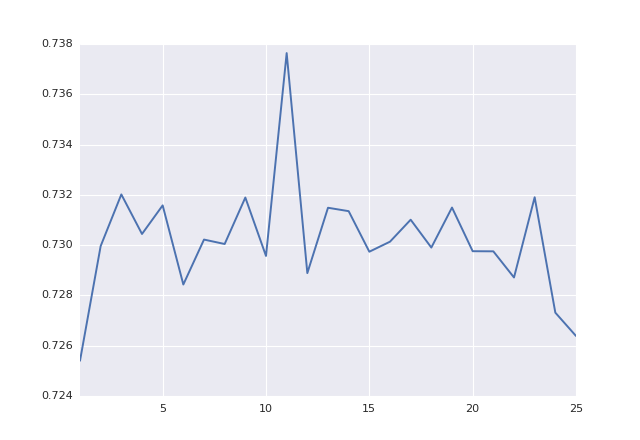

In [193]:
import matplotlib
%matplotlib nbagg

pd.Series(results, min_samples_leaf_options).plot();

### MODEL 8: Random Forest - Determine optimal depth for Random Forest

In [194]:
t_range = range(1, 100)
t_scores = []
for k in t_range:
    clf = RandomForestClassifier(max_depth=k)
    scores = cross_val_score(clf, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='accuracy')
    t_scores.append(scores.mean())
print t_scores

[0.69018530940801615, 0.68981077757281006, 0.69764799597518024, 0.70251830733970588, 0.70959528201688182, 0.69838587959081, 0.70361395270836835, 0.69990916205489406, 0.69950807758958011, 0.68982615014813575, 0.70474034322768175, 0.70287467158589079, 0.69279724970652357, 0.69092878305103689, 0.689430655710213, 0.70249594723014142, 0.69054586617474434, 0.69017552686008166, 0.69130471239309077, 0.69912376320643976, 0.68907149645033261, 0.69617222874392082, 0.69242691039186088, 0.70548102185700701, 0.68870115713567004, 0.69242271787131748, 0.70288864665436857, 0.69876600145340706, 0.6935602884454134, 0.70324640840740116, 0.69577393929230258, 0.68495444127676219, 0.70512046509027893, 0.68868159203980106, 0.70138912180669677, 0.68905193135446363, 0.70697355917044002, 0.6998868019453296, 0.69205377606350271, 0.70996422382469671, 0.6983914696182012, 0.6897940074906368, 0.68384901336016557, 0.69279445469282785, 0.69129632735200408, 0.70586114371960407, 0.69615965118229073, 0.70510229750125775, 

<IPython.core.display.Javascript object>


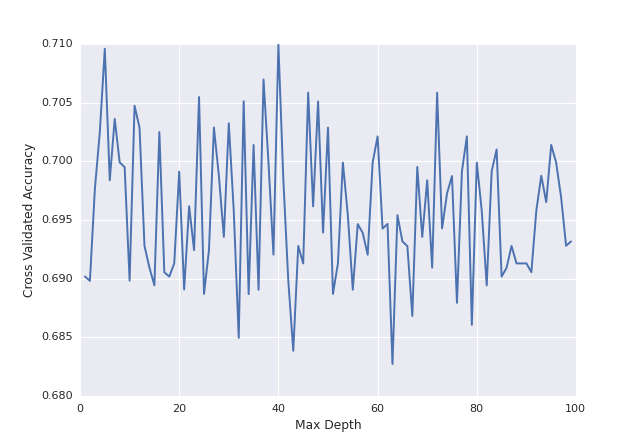

In [195]:
import matplotlib
%matplotlib nbagg
plt.plot(t_range, t_scores)
plt.xlabel('Max Depth')
plt.ylabel('Cross Validated Accuracy')

### MODEL 8: Random Forest - Search for an optimal number of estimators

In [196]:
k_range = range(1, 100)
k_scores = []
for k in k_range:
    rf = RandomForestClassifier(n_estimators=k, oob_score=True, random_state=42)
    rf_scores = cross_val_score(rf, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='accuracy')
    k_scores.append(rf_scores.mean())
print k_scores

[0.63008273240538881, 0.68457990944155633, 0.65995444127676228, 0.68832243277992056, 0.66629213483146077, 0.68009670747386664, 0.68458829448264313, 0.68607943428922802, 0.68421935267482803, 0.69764799597518024, 0.68233691095086368, 0.7040038571188999, 0.69726927161943097, 0.71518530940801617, 0.70362513276315064, 0.70363072279054173, 0.69540359997764001, 0.69092319302364591, 0.70885739840125217, 0.70698473922522209, 0.69354771088378331, 0.69913634076806974, 0.71145955615182521, 0.70323522835261887, 0.70547403432276823, 0.71258175415059521, 0.70324081838001007, 0.71184526804181347, 0.70585834870590858, 0.7114721337134553, 0.7039954720778131, 0.70176085862820725, 0.7069777516909832, 0.70361814522891164, 0.69876041142601597, 0.70922634020906694, 0.71070070993347856, 0.70772541785454746, 0.71071468500195656, 0.7040024596120521, 0.70622729051372346, 0.70212700542232653, 0.70250992229861919, 0.7189250377326849, 0.70437838895410587, 0.70326317848957465, 0.70473754821398626, 0.7043644138856280

/usr/local/lib/python2.7/site-packages/sklearn/ensemble/forest.py:379: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


<IPython.core.display.Javascript object>


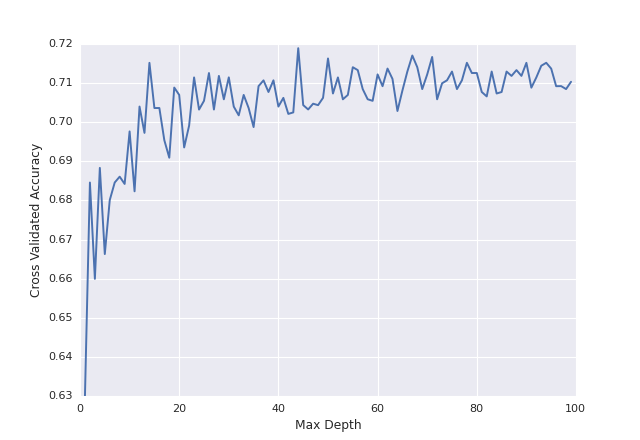

In [197]:
import matplotlib
%matplotlib nbagg
plt.plot(k_range, k_scores)
plt.xlabel('Max Depth')
plt.ylabel('Cross Validated Accuracy')

### MODEL 8: Random Forest - Plot number of estimators with cross-validated accuracy

### MODEL 8: Random Forest - optimize for max number of features

In [199]:
import matplotlib
%matplotlib nbagg

results = []
max_features_options = ["auto", None, "sqrt", "log2", 0.9, 0.2]

for max_features in max_features_options:
    model = RandomForestClassifier(n_estimators=44, oob_score=True, n_jobs=-1, random_state=42, max_features=max_features)
    model.fit(X, y)
    roc = cross_val_score(model, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='roc_auc').mean()
    print max_features, "option"
    print "C-stat: ", roc
    results.append(roc)
    print ""
    

auto option
C-stat:  0.72048731751

None option
C-stat:  0.714924615347

sqrt option
C-stat:  0.713115911

log2 option
C-stat:  0.719724525478

0.9 option
C-stat:  0.711890860757

0.2 option
C-stat:  0.726208812927



### MODEL 8: Re-Run Random Forest after optimization of all hyperparameters

In [200]:
import time
start = time.time()

rf = RandomForestClassifier(n_estimators=44, max_features=.2, max_depth=40,  oob_score=True, min_samples_leaf=11, random_state=42)
rf.fit(X, y)
rf_scores = cross_val_score(rf, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='accuracy')

end = time.time()
rftime1 = end - start

In [202]:
rf_mean1 = cross_val_score(rf, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='accuracy').mean()
print rf_mean1

0.708122309799


## MODEL 9: Bagged Random Forest (using optimized parameters from above)

In [211]:
rfbag_range = range(1, 100)
rfbag_scores = []

for k in rfbag_range:
    rfbag_clf = RandomForestClassifier(n_estimators=k, max_features=.2, max_depth=40,  oob_score=True, min_samples_leaf=11, random_state=42)
    rfbag_clf.fit(X, y)
    rfbag_clf_scores = cross_val_score(rfbag_clf, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='accuracy')
    rfbag_scores.append(rfbag_clf_scores.mean())


In [212]:
print rfbag_clf_scores

[ 0.69776119  0.73507463  0.73134328  0.74253731  0.69776119  0.73134328
  0.69029851  0.65298507  0.74626866  0.71910112]


<IPython.core.display.Javascript object>


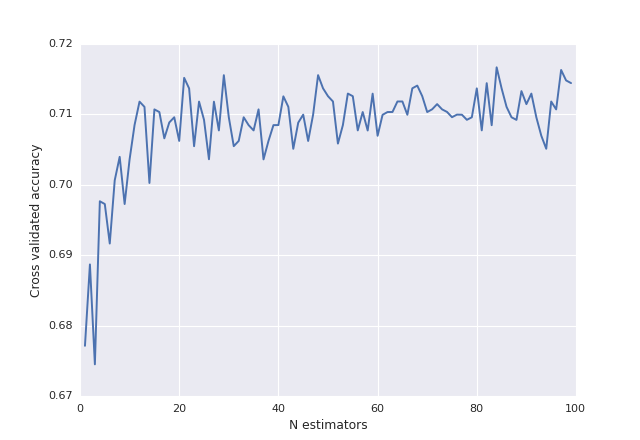

In [213]:
import matplotlib
%matplotlib nbagg

plt.plot(rfbag_range, rfbag_scores)
plt.xlabel('N estimators')
plt.ylabel('Cross validated accuracy')

In [214]:
import time
start = time.time()

rfbag_clf = RandomForestClassifier(n_estimators=21, max_features=.2, max_depth=40,  oob_score=True, min_samples_leaf=11, random_state=42)
rfbag_clf.fit(X, y)
rfbag_clf_scores = cross_val_score(rfbag_clf, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='accuracy').mean()

end = time.time()
rfbagtime1 = end - start

In [215]:
print rfbag_clf_scores

0.710711889988


# DATA2 - MUSIC

# STEP 1: DATA LOADING - Music

In [274]:
urllib.urlretrieve('http://www.webpages.uidaho.edu/erichs/music.json', '/git/data/hw3/music.json')

('/git/data/hw3/music.json', <httplib.HTTPMessage instance at 0x7f8a2ebb8758>)

In [275]:
with open('/git/data/hw3/music.json', 'rU') as f:
    data = [json.loads(row) for row in f]
    data2 = pd.DataFrame(data)

## What variables are appropriate to be used as features?

In [276]:
data2[:1]

asin helpful  overall  \
0  0006428320  [0, 0]        3   

                                          reviewText   reviewTime  \
0  The portfolio is fine except for the fact that...  03 11, 2014   

       reviewerID reviewerName        summary  unixReviewTime  
0  A1YS9MDZP93857  John Taylor  Parts missing      1394496000

#### Comment: from the fields above, 'helpful', 'overall', 'reviewText', 'unixReviewTime' are useful fields.  

FEATURE VARIABLES:

Helpfulness index - helpful index - represents a ratio - numerator is the number of people who rated this review
positively, with the denominator representing the total number of people who rated this review.

reviewText - main text of the review

Summary - a summary sentence of the review, provided by the reviewer.


RESPONSE VARIABLES:

Overall - overall ranking of review

# STEP 2: FEATURE SELECTION - Music

## Converting helpfulness rating into a percentage

In [277]:
helpfulness_ratio = data2.helpful.tolist()
helpfulness_ratio_final = pd.DataFrame(helpfulness_ratio)

In [278]:
helpfulness_ratio_final['helpfulness_ratio'] = helpfulness_ratio_final[0] / helpfulness_ratio_final[1]

## Preparing X and y: adding helpfulness ratio as a column, eliminating rows where helpfulness ratio is NAN.

In [279]:
data2 = pd.DataFrame(data)
data2 = pd.concat([data2, helpfulness_ratio_final], axis=1)
feature_cols = ['helpfulness_ratio', 'reviewText', 'unixReviewTime', 'summary', 'overall']
#feature_cols = ['reviewText']
# removing data that is not a review of 5 or 1 
music_best_worst = data2[(data2.overall==5) | (data2.overall==1)]
# removing rows that have NAN values for helpfulness (0/0)
music_best_worst = music_best_worst[np.isfinite(music_best_worst['helpfulness_ratio'])]


data2 = data2.sample(n=50000)


# group feature columns together for X
music_best_worst_featureadd = music_best_worst[feature_cols] #for use to create X

#--Setting X and y for music
#X = music_best_worst_featureadd


In [322]:
y = music_best_worst_featureadd.overall

## Vectorizing Reviewtext

In [281]:
data2["score"] = np.nan

In [282]:
import scipy as sp
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(binary=True, ngram_range=(1, 2), max_features=1000)
#y = data2["score"].values.astype(np.float32) 

X = sp.sparse.hstack((vectorizer.fit_transform(music_best_worst_featureadd.reviewText),music_best_worst_featureadd[['helpfulness_ratio','unixReviewTime']].values),format='csr')
X_columns=vectorizer.get_feature_names()+music_best_worst_featureadd[['helpfulness_ratio','unixReviewTime']].columns.tolist()


In [283]:
#X_reviewtext= sp.issparse(X_reviewtext)

## Create test train split

In [323]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99)

# STEP 3 : MODEL EVALUATION - Music

### MODEL 1: Comparing Test Accuracy with Null Accuracy

Null accuracy is the accuracy that could be achieved by always predicting the most frequent class. It is a benchmark against which you may want to measure your classification model.

In [324]:
# examine the class distribution
y_test.value_counts()

5    13354
1     2163
dtype: int64

In [325]:
import time
start - time.time()

# calculate the null accuracy
y_test.value_counts().head(1) / len(y_test)

end = time.time()
nulltime2 = end - start

In [326]:

nullmodel2 = sklearn.dummy.DummyClassifier(strategy='most_frequent', random_state=99, constant=None)
nullmodel2.fit(X,y)

DummyClassifier(constant=None, random_state=99, strategy='most_frequent')

In [327]:
y_pred_prob = nullmodel2.predict_proba(X_test)[:, 1]

In [328]:
# calculate AUC
print metrics.roc_auc_score(y_test, y_pred_prob)

ValueError: Data is not binary and pos_label is not specified

In [ ]:
nullmodel2.fit(X,y)

<IPython.core.display.Javascript object>


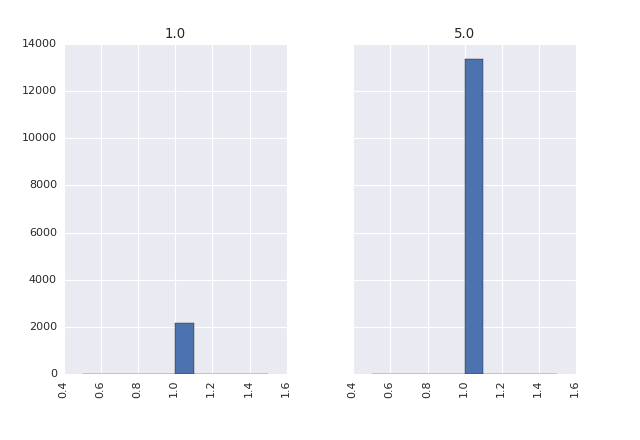

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f8a3a1a8610>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7f89c6f58dd0>], dtype=object)

In [270]:
# histogram of predicted probabilities grouped by actual response value
df = pd.DataFrame({'probability':y_pred_prob, 'actual':y_test})
df.hist(column='probability', by='actual', sharex=True, sharey=True)

In [271]:
import matplotlib
%matplotlib nbagg
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)

ValueError: Data is not binary and pos_label is not specified

In [302]:
nullmodel2_scores = cross_val_score(nullmodel2, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='accuracy').mean()
print nullmodel2_scores

0.858392695013


### MODEL 2: Naive-Bayes

### MODEL 2: Naive-Bayes - Multinomial Naive Bayes

In [254]:
import time
start = time.time()

from sklearn.naive_bayes import MultinomialNB
nbm2 = MultinomialNB()
nbm2.fit(X, y)
MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
nbm2_scores = cross_val_score(nbm2, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='accuracy').mean()

end = time.time()
nbmtime2 = end - start
print nbmtime2

1.74181413651


In [256]:
nbm2_scores_mean = cross_val_score(nbm2, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='accuracy').mean()
print nbm2_scores_mean

0.796781021978


In [ ]:
nbm2_scores_auc = cross_val_score(nbm2, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='roc_auc').mean()
print nbm2_scores_auc

### MODEL 2: Naive-Bayes - Gaussian Naive Bayes

In [297]:
import time
start = time.time()

from sklearn.naive_bayes import GaussianNB
nbg2 = GaussianNB()
nbg2.fit(X, y)
nbg2_scores = cross_val_score(nbg2, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='accuracy')
print nbg2_scores

end = time.time()
nbgtime2 = end - start
print nbgtime2

[ 0.72208797  0.71564363  0.72531013  0.71338811  0.71612695  0.72611568
  0.72413793  0.7197873   0.72172092  0.70238479]
28.9440989494


In [298]:
nbg2_scores_mean = cross_val_score(nbg2, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='accuracy').mean()
print nbg2_scores_mean

0.718622129922


In [ ]:
nbg2_scores_auc = cross_val_score(nbg2, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='roc_auc').mean()
print nbg2_scores_auc

### MODEL 2: Naive-Bayes - Bernoulli Naive Bayes

In [299]:
import time
start = time.time()

from sklearn.naive_bayes import BernoulliNB
nbb2 = BernoulliNB()
nbb2.fit(X, y)
BernoulliNB(alpha=1.0, class_prior=None, fit_prior=True)
nbb2_scores = cross_val_score(nbb2, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='accuracy')
print nbb_scores

end = time.time()
nbbtime2 = end - start
print nbbtime2

[ 0.64552239  0.68283582  0.71641791  0.72761194  0.63432836  0.61940299
  0.64552239  0.68283582  0.68656716  0.71161049]
25.2756748199


In [300]:
nbb2_scores_mean = cross_val_score(nbb2, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='accuracy').mean()
print nbb2_scores_mean

0.804546871259


In [ ]:
nbb2_scores_auc = cross_val_score(nbb2, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='roc_auc').mean()
print nbb2_scores_auc

### MODEL3: KNN

In [312]:
knn2 = KNeighborsClassifier(n_neighbors=9)
#strongy = data1.FelRecidYr3
knn2.fit(X,y)
knn2_scores = cross_val_score(knn2, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='accuracy')
print knn2_scores

[ 0.85161914  0.8490414   0.85403577  0.85033027  0.85564685  0.85790237
  0.86545279  0.85626813  0.85030616  0.86142443]


In [313]:
# use average accuracy as an estimate of out-of-sample accuracy
print knn2_scores.mean()


0.855202730006


In [ ]:
# search for an optimal value of K for KNN
k2_range = range(1, 20)
k2_scores = []
for k in k2_range:
    knn2 = KNeighborsClassifier(n_neighbors=k)
    knn2_scores = cross_val_score(knn2, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='accuracy')
    k2_scores.append(knn2_scores.mean())
print knn2_scores

<IPython.core.display.Javascript object>


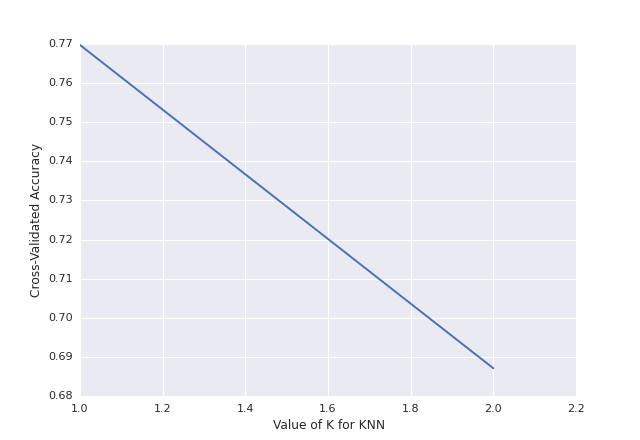

In [332]:
import matplotlib
%matplotlib nbagg

# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k2_range, k2_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

### MODEL3: KNN - Re-run KNN model with optimized K = 40

In [ ]:
import time
start = time.time()

# 10-fold cross-validation with K=5 for KNN (the n_neighbors parameter)
knn2 = KNeighborsClassifier(n_neighbors=40)
#strongy = data1.FelRecidYr3
knn2_scores = cross_val_score(knn2, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='accuracy')

end = time.time()
knntime2 = end - start
print knntime2

In [ ]:
print knn2_scores

In [ ]:
knn_mean2 = cross_val_score(knn2, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='accuracy').mean()

In [ ]:
import math
mean_score = knn2_scores.mean()
std_dev = knn2_scores.std()
std_error = knn2_scores.std() / math.sqrt(scores.shape[0])
ci =  2.262 * std_error
lower_bound = mean_score - ci
upper_bound = mean_score + ci

print "Score is %f +/-  %f" % (mean_score, ci)
print '95 percent probability that if this experiment were repeated over and over the average score would be between %f and %f' % (lower_bound, upper_bound)

### MODEL 4: Logistic Regression

#### MODEL 4: Logistic Regression - 10-fold cross-validation with logistic regression

In [ ]:
import time
start = time.time()

from sklearn.linear_model import LogisticRegression
logreg2 = LogisticRegression()
logreg2.fit(X,y)
logreg2_scores = cross_val_score(logreg2, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='accuracy')

end = time.time()
logregtime2 = end - start
print logregtime2

In [ ]:
logreg2_auc_scores = cross_val_score(logreg2, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='roc_auc')

#### MODEL 4: Logistic Regression - Print Logistic Regression cross validation accuracy scores

print logreg_scores

#### MODEL 4: Logistic Regression - Print Logistic Regression cross validation accuracy score - mean

In [ ]:
logreg_mean2 = cross_val_score(logreg2, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='accuracy').mean()

#### MODEL 4: Logistic Regression - Print Logistic Regression cross validation auc score - mean

In [ ]:
print logreg2_auc_scores.mean()

In [ ]:
mean_score = logreg2_scores.mean()
std_dev = logreg2_scores.std()
std_error = logreg2_scores.std() / math.sqrt(logreg_scores.shape[0])
ci =  2.262 * std_error
lower_bound = mean_score - ci
upper_bound = mean_score + ci

print "Score is %f +/-  %f" % (mean_score, ci)
print '95 percent probability that if this experiment were repeated over and over the average score would be between %f and %f' % (lower_bound, upper_bound)

### MODEL 5: SVM Polynomial Kernel

#### MODEL 5: SVM Polynomial Kernel - 10-fold cross-validation with SVM Poly

In [ ]:
# 10-fold cross-validation with SVM Polynomial
from sklearn import svm
svmpoly2 = svm.SVC(kernel='poly', gamma=2)
svmpoly2.fit(X,y)
svmpoly2_scores = cross_val_score(svmpoly2, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='accuracy')
print svmpoly2_scores

#### MODEL 5: SVM Polynomial Kernel - Search for an optimal gamma/depth for SVM Polynomial

In [ ]:
# search for an optimal gamma for SVM Polynomial
g_range = range(1, 10)
g_scores = []
for k in g_range:
    knn = svm.SVC(kernel='poly', gamma=k)
    scores = cross_val_score(svmpoly, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='accuracy')
    g_scores.append(scores.mean())
print g_scores

In [ ]:
import matplotlib
%matplotlib nbagg

# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(g_range, g_scores)
plt.xlabel('Gamma for SVM Polynomial')
plt.ylabel('Cross-Validated Accuracy')

#### MODEL 5: SVM Polynomial Kernel - Optimized

In [ ]:
import time
start = time.time()

from sklearn import svm
svmpoly2 = svm.SVC(kernel='poly', gamma=2)
svmpoly2.fit(X,y)
svmpoly2_scores = cross_val_score(svmpoly2, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='accuracy').mean()

end = time.time()
svmpolytime2 = end - start
print svmpolytime2

### MODEL 5: SVM Gaussian Kernel

In [ ]:

# 10-fold cross-validation with SVM Polynomial
from sklearn import svm
svmrbf = svm.SVC(kernel='rbf', gamma=2)
svmrbf.fit(X,y)
svmrbf2_scores = cross_val_score(svmrbf, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='accuracy')

In [ ]:
print svmrbf2_scores.mean()

In [ ]:
# search for an optimal gamma for SVM Polynomial
g_range = range(1, 10)
g_scores = []
for k in g_range:
    svmrbf = svm.SVC(kernel='rbf', gamma=k)
    svmrbf_scores = cross_val_score(svmrbf, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='accuracy')
    g_scores.append(svmrbf_scores.mean())
print g_scores

In [ ]:
import matplotlib
%matplotlib nbagg

# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(g_range, g_scores)
plt.xlabel('Gamma for SVM Gaussian')
plt.ylabel('Cross-Validated Accuracy')

In [ ]:
import time
start = time.time()

from sklearn import svm
svmrbf = svm.SVC(kernel='rbf', gamma=k)
svmrbf.fit(X,y)
svmrbf_scores = cross_val_score(svmrbf, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='accuracy')

end = time.time()
svmgaustime2 = end - start
print svmgaustime2

### MODEL 6: Decision Tree

#### MODEL 6: Decision Tree - Initial Decision Tree with max depth of 10

In [ ]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=10)
clf.fit(X,y)
clf_scores = cross_val_score(clf, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='accuracy')

#### MODEL 6: Decision Tree - Print Decision Tree cross validation accuracy scores

In [ ]:
print clf_scores

#### MODEL 6: Decision Tree -  Print Decision Tree cross validation accuracy score - mean

In [ ]:
clf_scores_mean = cross_val_score(clf, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='accuracy').mean()
print clf_scores_mean

#### MODEL 6: Decision Tree - Print Decision Tree cross validation auc score - mean

In [ ]:
clf_scores_auc = cross_val_score(clf, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='roc_auc').mean()
print clf_scores_auc

#### MODEL 6: Decision Tree - Save and print graphic of Decision Tree

In [ ]:
from sklearn.externals.six import StringIO  
import pydot 
dot_data = StringIO() 
tree.export_graphviz(clf, out_file=dot_data)
graph = pydot.graph_from_dot_data(dot_data.getvalue()) 

In [ ]:
graph.write_jpeg("hw3_tree_plot.jpg")

In [ ]:
from IPython.display import Image
Image(filename='hw3_tree_plot.jpg')

### MODEL 6: Decision Tree - search for an optimal gamma/depth for Decision Tree

In [ ]:
t_range = range(1, 100)
t_scores = []
for k in t_range:
    clf = tree.DecisionTreeClassifier(max_depth=k)
    scores = cross_val_score(clf, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='accuracy')
    t_scores.append(scores.mean())
print t_scores

### MODEL 6: Decision Tree - Plot accuracy of cross validation runs vs. values of depth

In [ ]:
import matplotlib
%matplotlib nbagg
plt.plot(t_range, t_scores)
plt.xlabel('Value of Depth for Decision Tree')
plt.ylabel('Cross-Validated Accuracy')

### MODEL 6: Decision Tree with optimized results for max depth

In [ ]:
import time
start = time.time()

from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=45)
clf.fit(X,y)
clf_mean2 = cross_val_score(clf, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='accuracy').mean()

end = time.time()
clftime2 = end - start
print clftime2

### MODEL 7: Bootstrap Aggregation using Decision Tree

In [ ]:
bag_scores = []

bag_range = range(1, 100)

for k in bag_range:
    bag_clf = BaggingClassifier(clf, n_estimators=k, max_samples=1.0, max_features=5, bootstrap = False, bootstrap_features = True, random_state=42)
    bag_clf.fit(X, y)
    bag_clf_scores = cross_val_score(bag_clf, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='accuracy')
    bag_scores.append(bag_clf_scores.mean())
print bag_clf_scores

In [ ]:
import matplotlib
%matplotlib nbagg
# plot max_depth (x-axis) versus RMSE (y-axis)
plt.plot(bag_range, bag_scores)
plt.xlabel('max_depth')
plt.ylabel('Cross validated accuracy')

## MODEL 7: Bootstrap aggregation using Decision Tree - optimized

In [ ]:
import time
start = time.time()

bag_clf = BaggingClassifier(clf, n_estimators=k, max_samples=1.0, max_features=5, bootstrap = False, bootstrap_features = True, random_state=42)
bag_clf.fit(X, y)
bag_clf_scores = cross_val_score(bag_clf, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='accuracy').mean()

end = time.time()
bagclftime2 = end - start
print bagclftime2

### MODEL 8: Random Forest

In [ ]:
rf = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=42)
rf.fit(X, y)
rf_scores = cross_val_score(rf, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='accuracy')

In [ ]:
rf_auc_scores = cross_val_score(rf, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='roc_auc')

In [ ]:
print rf_scores

In [ ]:
print rf_scores.mean()

In [ ]:
rf.oob_score_

### MODEL 8: Random Forest - Find optimal number of leaves

In [ ]:
results = []
min_samples_leaf_options = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]
for min_samples in min_samples_leaf_options:
    rf = RandomForestClassifier(n_estimators=100, 
                                  oob_score=True, 
                                  n_jobs=-1, 
                                  random_state=42, 
                                  max_features="auto", 
                                  min_samples_leaf=min_samples)
    rf.fit(X, y)
    print min_samples, "min samples"
    roc = cross_val_score(rf, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='roc_auc').mean()
    print "C-stat: ", roc
    results.append(roc)
    print ""

In [ ]:
import matplotlib
%matplotlib nbagg

pd.Series(results, min_samples_leaf_options).plot();

### MODEL 8: Random Forest - Determine optimal depth for Random Forest

In [ ]:
t_range = range(1, 100)
t_scores = []
for k in t_range:
    clf = RandomForestClassifier(max_depth=k)
    scores = cross_val_score(clf, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='accuracy')
    t_scores.append(scores.mean())
print t_scores

In [ ]:
import matplotlib
%matplotlib nbagg
plt.plot(t_range, t_scores)
plt.xlabel('Max Depth')
plt.ylabel('Cross Validated Accuracy')

### MODEL 8: Random Forest - Search for an optimal number of estimators

In [ ]:
k_range = range(1, 100)
k_scores = []
for k in k_range:
    rf = RandomForestClassifier(n_estimators=k, oob_score=True, random_state=42)
    rf_scores = cross_val_score(rf, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='accuracy')
    k_scores.append(rf_scores.mean())
print k_scores

### MODEL 8: Random Forest - Plot number of estimators with cross-validated accuracy

In [ ]:
import matplotlib
%matplotlib nbagg
plt.plot(k_range, k_scores)
plt.xlabel('Number of Estimators')
plt.ylabel('Cross-Validated Accuracy')

### MODEL 8: Random Forest - optimize for max number of features

In [ ]:
import matplotlib
%matplotlib nbagg

results = []
max_features_options = ["auto", None, "sqrt", "log2", 0.9, 0.2]

for max_features in max_features_options:
    model = RandomForestClassifier(n_estimators=10, oob_score=True, n_jobs=-1, random_state=42, max_features=max_features)
    model.fit(X, y)
    roc = cross_val_score(model, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='roc_auc').mean()
    print max_features, "option"
    print "C-stat: ", roc
    results.append(roc)
    print ""
    
pd.Series(results, max_features_options).plot(kind="barh", xlim=(.60,.65));

### MODEL 8: Re-Run Random Forest after optimization of all hyperparameters

In [ ]:
rftime2 = %%timeit -o 1 + 2
rf = RandomForestClassifier(n_estimators=60, max_features=.2, max_depth=50,  oob_score=True, min_samples_leaf=10, random_state=42)
rf.fit(X, y)
rf_mean2 = cross_val_score(rf, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='accuracy').mean()

In [ ]:
rf_auc_scores = cross_val_score(rf, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='roc_auc')

## MODEL 8a: Bagged Random Forest (using optimized parameters from above)

In [ ]:
rfbag_scores = []

rfbag_range = range(1, 100)
rfRMSE_scores = []

for k in bag_range:
    rfbag_clf = RandomForestClassifier(n_estimators=60, max_features=.2, max_depth=50,  oob_score=True, min_samples_leaf=10, random_state=42)
    rfbag_clf.fit(X, y)
    rfbag_clf_scores = cross_val_score(rfbag_clf, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='accuracy')
    rfMSE_scores = cross_val_score(rfbag_clf, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='mean_squared_error')
    rfbag_scores.append(rfbag_clf_scores.mean())
    rfRMSE_scores.append(np.mean(np.sqrt(-rfMSE_scores)))
print rfbag_clf_scores

In [ ]:
import matplotlib
%matplotlib nbagg
# plot max_depth (x-axis) versus RMSE (y-axis)
plt.plot(rfbag_range, rfbag_scores)
plt.xlabel('N estimators')
plt.ylabel('RMSE (lower is better)')

## MODEL 9:  NOISY REPLICATION

## MODEL 10: Additional Classifier

# STEP 4: RESULTS! - all data

### Summary ROCs for all models - DATA2 - RECIDIVISM

In [ ]:
# TASK 7: plot the ROC curve
import matplotlib
%matplotlib nbagg
from sklearn import metrics
import pandas as pd
from ggplot import *

nullmodel_preds = nullmodel.predict_proba(X_test)[:,1]
nullmodel_fpr, nullmodel_tpr, _ = metrics.roc_curve(y_test, nullmodel_preds)

knn_preds = knn.predict_proba(X_test)[:,1]
knn_fpr, knn_tpr, _ = metrics.roc_curve(y_test, knn_preds)

nbm_preds = nbm.predict_proba(X_test)[:,1]
nbm_fpr, nbm_tpr, _ = metrics.roc_curve(y_test, nbm_preds)

nbg_preds = nbg.predict_proba(X_test)[:,1]
nbg_fpr, nbg_tpr, _ = metrics.roc_curve(y_test, nbg_preds)

nbb_preds = nbb.predict_proba(X_test)[:,1]
nbb_fpr, nbb_tpr, _ = metrics.roc_curve(y_test, nbb_preds)

logreg_preds = logreg.predict_proba(X_test)[:,1]
logreg_fpr, logreg_tpr, _ = metrics.roc_curve(y_test, logreg_preds)

clf_preds = clf.predict_proba(X_test)[:,1]
clf_fpr, clf_tpr, _ = metrics.roc_curve(y_test, clf_preds)

bag_clf_preds = bag_clf.predict_proba(X_test)[:,1]
bag_fpr, bag_tpr, _ = metrics.roc_curve(y_test, bag_clf_preds)

rf_clf_preds = rf_clf.predict_proba(X_test)[:,1]
rf_fpr, rf_tpr, _ = metrics.roc_curve(y_test, rf_clf_preds)

plt.plot(nullmodel_fpr, nullmodel_tpr, color='gray') # KNN
plt.plot(knn_fpr, knn_tpr, color='blue') # KNN
plt.plot(logreg_fpr, logreg_tpr, color='red') # Logistic Regression
plt.plot(nbm_fpr, nbm_tpr, color='green') # Naive Bayes Multinomial
plt.plot(nbg_fpr, nbg_tpr, color='magenta') # Naive Bayes Gaussian
plt.plot(nbb_fpr, nbb_tpr, color='yellow') # Naive Bayes Bernoulli
plt.plot(clf_fpr, clf_tpr, color='orange') # Decision Tree
plt.plot(bag_fpr, bag_tpr, color='black') # Bagged Decision Tree
plt.plot(rf_fpr, rf_tpr, color='brown')


plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')




### Summary ROCs for all models - DATA2 - MUSIC

In [ ]:
# TASK 7: plot the ROC curve
import matplotlib
%matplotlib nbagg
from sklearn import metrics
import pandas as pd
from ggplot import *

nullmodel2_preds = nullmodel2.predict_proba(X_test)[:,1]
nullmodel2_fpr, nullmodel_tpr, _ = metrics.roc_curve(y_test, nullmodel2_preds)

knn2_preds = knn2.predict_proba(X_test)[:,1]
knn2_fpr, knn2_tpr, _ = metrics.roc_curve(y_test, knn2_preds)

nbm2_preds = nbm2.predict_proba(X_test)[:,1]
nbm2_fpr, nbm2_tpr, _ = metrics.roc_curve(y_test, nbm2_preds)

nbg2_preds = nbg2.predict_proba(X_test)[:,1]
nbg2_fpr, nbg2_tpr, _ = metrics.roc_curve(y_test, nbg2_preds)

nbb2_preds = nbb2.predict_proba(X_test)[:,1]
nbb2_fpr, nbb2_tpr, _ = metrics.roc_curve(y_test, nbb2_preds)

logreg2_preds = logreg2.predict_proba(X_test)[:,1]
logreg2_fpr, logreg2_tpr, _ = metrics.roc_curve(y_test, logreg2_preds)

clf2_preds = clf2.predict_proba(X_test)[:,1]
clf2_fpr, clf2_tpr, _ = metrics.roc_curve(y_test, clf2_preds)

bag_clf2_preds = bag_clf2.predict_proba(X_test)[:,1]
bag2_fpr, bag2_tpr, _ = metrics.roc_curve(y_test, bag_clf2_preds)

rf_clf2_preds = rf_clf2.predict_proba(X_test)[:,1]
rf2_fpr, rf2_tpr, _ = metrics.roc_curve(y_test, rf_clf2_preds)

plt.plot(nullmodel2_fpr, nullmodel2_tpr, color='gray') # KNN
plt.plot(knn2_fpr, knn2_tpr, color='blue') # KNN
plt.plot(logreg2_fpr, logreg2_tpr, color='red') # Logistic Regression
plt.plot(nbm2_fpr, nbm2_tpr, color='green') # Naive Bayes Multinomial
plt.plot(nbg2_fpr, nbg2_tpr, color='magenta') # Naive Bayes Gaussian
plt.plot(nbb2_fpr, nbb2_tpr, color='yellow') # Naive Bayes Bernoulli
plt.plot(clf2_fpr, clf2_tpr, color='orange') # Decision Tree
plt.plot(bag2_fpr, bag2_tpr, color='black') # Bagged Decision Tree
plt.plot(rf2_fpr, rf2_tpr, color='brown')


plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')




## Plot time and cv for both datasets, for all models

In [ ]:
time1 = [nulltime1.best, nbmtime1.best, nbgtime1.best, nbbtime1.best, logregtime1.best, svmpolytime1.best, svmgaustime1.best, clftime1.best, bagtime1.best, rftime1.best, noisetime1.best, xtime1.best]
cv1 = [nullmodel_mean1, nbm_scores_mean1, nbg_scores_mean1, nbb_scores_mean1, knn_scores_mean1, svmpoly_mean1, svmgaus_mean1, clf_mean1, bagclf_mean1, rf_mean1, noise_mean1, xxx_mean1]

In [ ]:
time2 = [nulltime2.best, nbmtime2.best, nbgtime2.best, nbbtime2.best, logregtime2.best, svmpolytime2.best, svmgaustime2.best, clftime2.best, bagtime2.best, rftime2.best, noisetime2.best, xtime2.best]
cv2 = [nullmodel_mean2, nbm_scores_mean2, nbg_scores_mean2, nbb_scores_mean2, knn_scores_mean2, svmpoly_mean2, svmgaus_mean2, clf_mean2, bagclf_mean2, rf_mean2, noise_mean2, xxx_mean2]